In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt 
import numpy as np 

# Subplots

In matplotlib, a conceptual grid is overlayed on the figure. **__Subplot()__** allows to creat different axis to different portions of this grid.<br>
**_Subplot(1, 2, 1)_** creates a figure with 1 row and 2 columns and sets the first axis to be the current axis.<br>
**_Subplot(1, 2, 2)_** creates a figure on the 2nd axis, the one of the right.

<IPython.core.display.Javascript object>


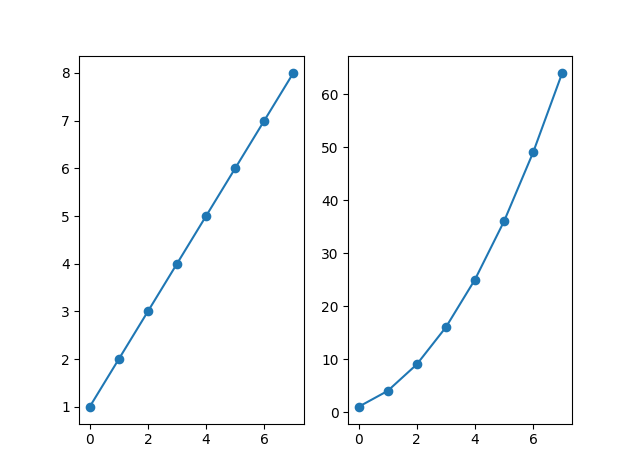

In [4]:
plt.figure()

plt.subplot(1, 2, 1) 
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

exponential_data = linear_data**2 
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

The two different y-axis could be misleading to the reader. To avoid that, we can **lock/share** the y-axis between the two subplots. 

<IPython.core.display.Javascript object>


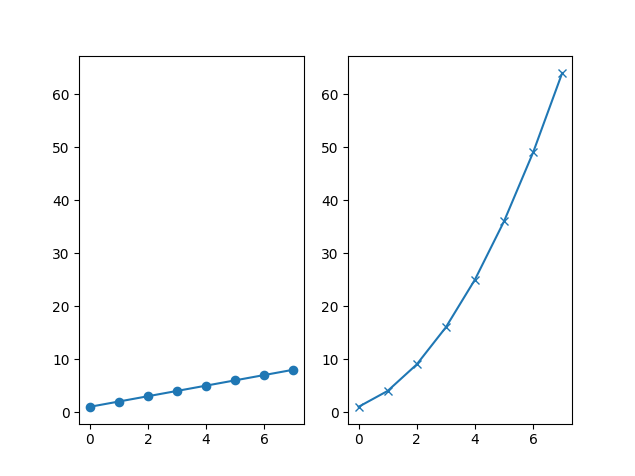

In [5]:
plt.figure() 
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

**To remember:** the plot location in a subplot starts from 1 and not 0.<br>
**_Subplots()_** allows to get many axis objects at once. 

<IPython.core.display.Javascript object>


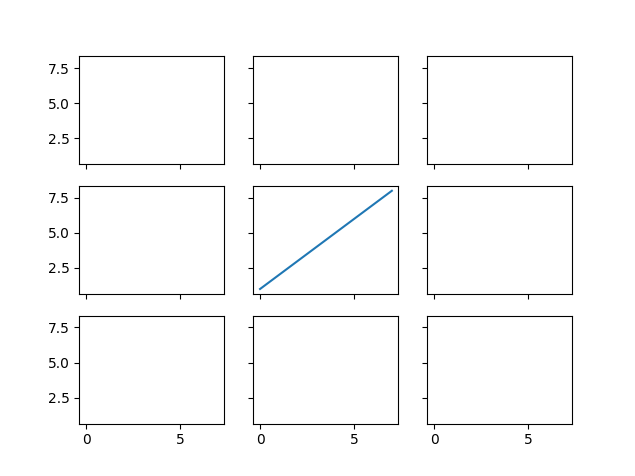

In [6]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)

ax5.plot(linear_data, '-')

To draw back the **x-axis** and **y-axis** to the subplots we can use the following: 

In [8]:
for ax in plt.gcf().get_axes(): 
    for label in ax.get_xticklabels() + ax.get_yticklabels() :
        label.set_visible(True)

# Histograms

Histograms are bar charts showing the frequency of a given phenomena. Example: Probability distributions.<br>
We will plot some samples from the normal distributions.

<IPython.core.display.Javascript object>


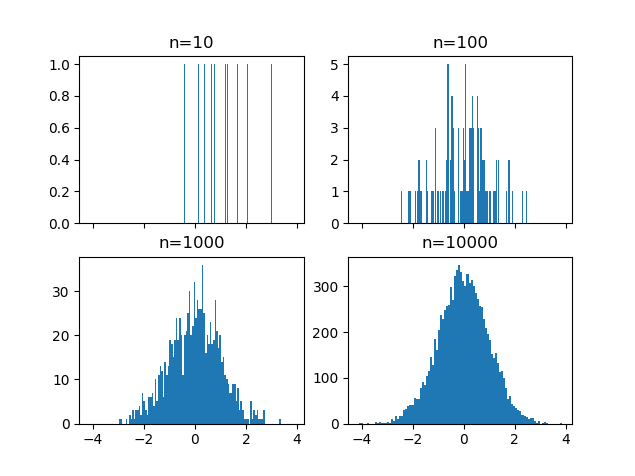

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex= True)
axs = [ax1, ax2, ax3, ax4]

for n in range (0, len(axs)): 
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


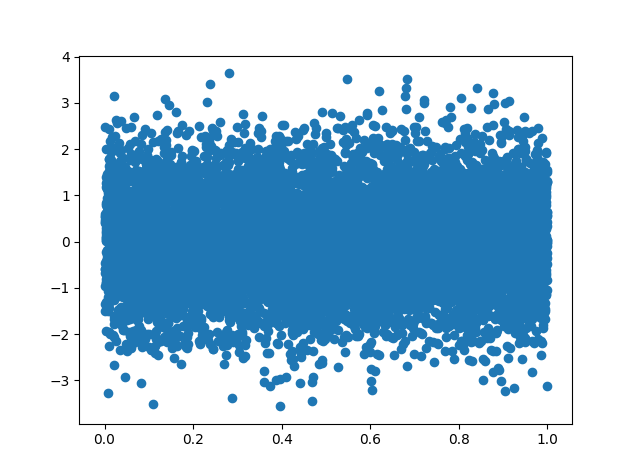

In [18]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


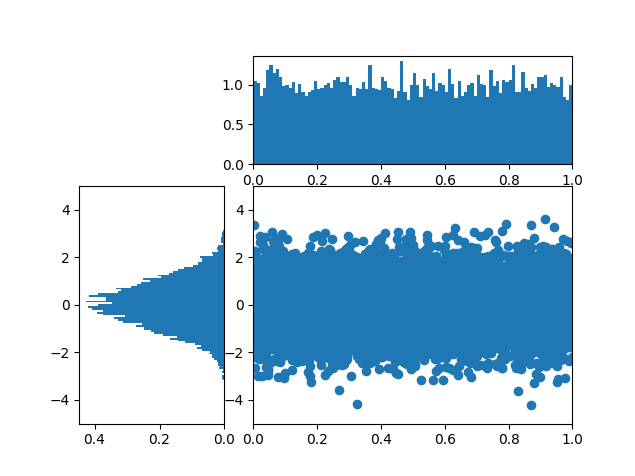

In [33]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)#creating a 3x3 grid. The grid indices start from 0. gspec is a list.

top_histogram = plt.subplot(gspec[0, 1:]) 
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:,1:])

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

The **bottom right** is for the **_scatterplot_**. <br> The **top histogram** is for the **_x values_**. <br>The **side histogram** is for the **_y values_**. we want it to be lined up, therefore the layout is rotated. 

In [ ]:
# top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [36]:
#  change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Box Plot